In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
concrete = pd.read_csv('datasets/concrete_data.csv')

concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = concrete.drop('csMPa', axis=1)

Y = concrete['csMPa']

In [4]:
X = X.drop(['flyash', 'coarseaggregate', 'fineaggregate'], axis=1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = baseline.predict(x_test)

r2_score(y_test, y_pred)

0.8586096144366588

In [8]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.375438
cement              0.328323
water               0.105318
slag                0.096804
superplasticizer    0.094116
dtype: float64

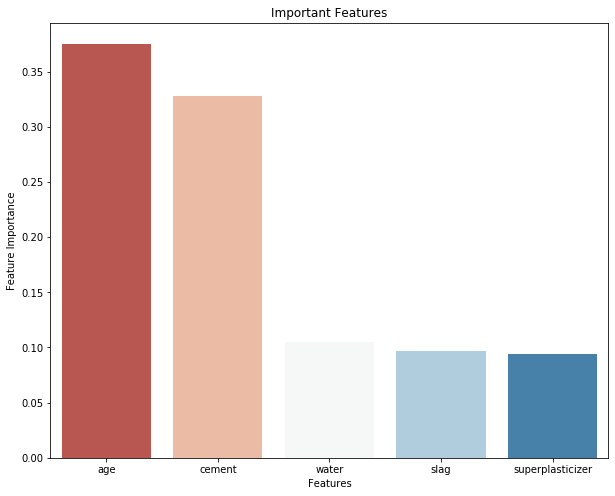

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [10]:
gbr = GradientBoostingRegressor(max_depth=3)

In [11]:
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)

In [12]:
gridsearch_reg.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [13]:
gridsearch_reg.best_params_

{'n_estimators': 500}

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr_best.fit(x_train, y_train)

NameError: name 'gbr_best' is not defined

In [ ]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True)

### Tuning for n_estimators
warm_start=True  allows you to add more estimators to an already fitted model.

In [16]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr.n_estimators = n_estimators
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  248.71145133867216
No. of estimators:  2
Validation error:  222.12822038060247
No. of estimators:  3
Validation error:  199.28873230430426
No. of estimators:  4
Validation error:  181.3789184745534
No. of estimators:  5
Validation error:  164.38301076566609
No. of estimators:  6
Validation error:  150.68655178419777
No. of estimators:  7
Validation error:  140.17085999508848
No. of estimators:  8
Validation error:  130.74060222303874
No. of estimators:  9
Validation error:  122.86888828604742
No. of estimators:  10
Validation error:  114.45788366147363
No. of estimators:  11
Validation error:  108.28490617000404
No. of estimators:  12
Validation error:  101.45308858187535
No. of estimators:  13
Validation error:  96.03468477727155
No. of estimators:  14
Validation error:  91.69304463588468
No. of estimators:  15
Validation error:  87.67332443694119
No. of estimators:  16
Validation error:  82.84174285571424
No. of estimators:  17
Validation erro

No. of estimators:  137
Validation error:  29.195909172469122
No. of estimators:  138
Validation error:  29.130213253562694
No. of estimators:  139
Validation error:  29.153456619831232
No. of estimators:  140
Validation error:  29.130783211669492
No. of estimators:  141
Validation error:  29.030372744043003
No. of estimators:  142
Validation error:  29.018244303536733
No. of estimators:  143
Validation error:  28.938751451311546
No. of estimators:  144
Validation error:  28.94648537860446
No. of estimators:  145
Validation error:  28.87382360101408
No. of estimators:  146
Validation error:  28.806458637045175
No. of estimators:  147
Validation error:  28.770485194076326
No. of estimators:  148
Validation error:  28.808205240125627
No. of estimators:  149
Validation error:  28.706096076802055
No. of estimators:  150
Validation error:  28.697601545776486
No. of estimators:  151
Validation error:  28.596731972115442
No. of estimators:  152
Validation error:  28.556639398233255
No. of est

No. of estimators:  271
Validation error:  24.73745939372073
No. of estimators:  272
Validation error:  24.696748075340057
No. of estimators:  273
Validation error:  24.691447718965385
No. of estimators:  274
Validation error:  24.65614970864182
No. of estimators:  275
Validation error:  24.696091116296806
No. of estimators:  276
Validation error:  24.668204722995892
No. of estimators:  277
Validation error:  24.687615181236385
No. of estimators:  278
Validation error:  24.64995448025784
No. of estimators:  279
Validation error:  24.631066342445123
No. of estimators:  280
Validation error:  24.621400841683247
No. of estimators:  281
Validation error:  24.612770568610376
No. of estimators:  282
Validation error:  24.63364069384208
No. of estimators:  283
Validation error:  24.627645085805845
No. of estimators:  284
Validation error:  24.614884730983373
No. of estimators:  285
Validation error:  24.61893091373617
No. of estimators:  286
Validation error:  24.607194199274893
No. of estima

No. of estimators:  404
Validation error:  22.807089376771135
No. of estimators:  405
Validation error:  22.78984550161055
No. of estimators:  406
Validation error:  22.769075937122015
No. of estimators:  407
Validation error:  22.738699543103944
No. of estimators:  408
Validation error:  22.751087770976607
No. of estimators:  409
Validation error:  22.654303244805607
No. of estimators:  410
Validation error:  22.678297048397766
No. of estimators:  411
Validation error:  22.64565388011614
No. of estimators:  412
Validation error:  22.679434967866612
No. of estimators:  413
Validation error:  22.660068905737038
No. of estimators:  414
Validation error:  22.626626438757043
No. of estimators:  415
Validation error:  22.64888282178616
No. of estimators:  416
Validation error:  22.645321637185837
No. of estimators:  417
Validation error:  22.657738715947584
No. of estimators:  418
Validation error:  22.629865624708692
No. of estimators:  419
Validation error:  22.63645283917256
No. of estim

In [17]:
n_estimators

424

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)

In [20]:
gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=424,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

0.9080476253073358